# Importing Libraries

In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.preprocessing import LabelEncoder

# Read and analyse data

In [110]:
data = pd.read_csv("salary.csv")

In [111]:
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [112]:
data.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [113]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [114]:
data.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
salary            0
dtype: int64

In [115]:
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'salary'],
      dtype='object')

In [117]:
feat_data=['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country']
count=[]
for col in feat_data:
    count.append((X[col]==0).sum())
pd.DataFrame(count,feat_data).rename(columns ={0:'N_zeros'})

,N_zeros
age,0
workclass,0
fnlwgt,0
education,0
education-num,0
marital-status,0
occupation,0
relationship,0
race,0
sex,0


In [118]:
data['capital-gain'].value_counts()

0        29849
15024      347
7688       284
7298       246
99999      159
         ...  
1111         1
2538         1
22040        1
4931         1
5060         1
Name: capital-gain, Length: 119, dtype: int64

In [119]:
data['capital-loss'].value_counts()

0       31042
1902      202
1977      168
1887      159
1848       51
        ...  
2080        1
1539        1
1844        1
2489        1
1411        1
Name: capital-loss, Length: 92, dtype: int64

# Label Encoding

In [120]:
label_encoder = LabelEncoder()
label_encoder.fit(data['education'])
data.loc[:,'education'] = label_encoder.transform(data['education'])


In [121]:
label_encoder = LabelEncoder()
label_encoder.fit(data['occupation'])
data.loc[:,'occupation'] = label_encoder.transform(data['occupation'])

In [122]:
label_encoder = LabelEncoder()
label_encoder.fit(data['native-country'])
data.loc[:,'native-country'] = label_encoder.transform(data['native-country'])

In [123]:
label_encoder = LabelEncoder()
label_encoder.fit(data['workclass'])
data.loc[:,'workclass'] = label_encoder.transform(data['workclass'])

In [124]:
label_encoder = LabelEncoder()
label_encoder.fit(data['sex'])
data.loc[:,'sex'] = label_encoder.transform(data['sex'])

In [125]:
label_encoder = LabelEncoder()
label_encoder.fit(data['relationship'])
data.loc[:,'relationship'] = label_encoder.transform(data['relationship'])

In [126]:
label_encoder = LabelEncoder()
label_encoder.fit(data['race'])
data.loc[:,'race'] = label_encoder.transform(data['race'])

In [127]:
label_encoder = LabelEncoder()
label_encoder.fit(data['marital-status'])
data.loc[:,'marital-status'] = label_encoder.transform(data['marital-status'])

In [128]:
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,7,77516,9,13,4,1,1,4,1,2174,0,40,39,<=50K
1,50,6,83311,9,13,2,4,0,4,1,0,0,13,39,<=50K
2,38,4,215646,11,9,0,6,1,4,1,0,0,40,39,<=50K
3,53,4,234721,1,7,2,6,0,2,1,0,0,40,39,<=50K
4,28,4,338409,9,13,2,10,5,2,0,0,0,40,5,<=50K


In [129]:
data.describe()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
count,32561.000000,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,3.868892,1.897784e+05,10.298210,10.080679,2.611836,6.572740,1.446362,3.665858,0.669205,1077.648844,87.303830,40.437456,36.718866
std,13.640433,1.455960,1.055500e+05,3.870264,2.572720,1.506222,4.228857,1.606771,0.848806,0.470506,7385.292085,402.960219,12.347429,7.823782
min,17.000000,0.000000,1.228500e+04,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,4.000000,1.178270e+05,9.000000,9.000000,2.000000,3.000000,0.000000,4.000000,0.000000,0.000000,0.000000,40.000000,39.000000
50%,37.000000,4.000000,1.783560e+05,11.000000,10.000000,2.000000,7.000000,1.000000,4.000000,1.000000,0.000000,0.000000,40.000000,39.000000
75%,48.000000,4.000000,2.370510e+05,12.000000,12.000000,4.000000,10.000000,3.000000,4.000000,1.000000,0.000000,0.000000,45.000000,39.000000
max,90.000000,8.000000,1.484705e+06,15.000000,16.000000,6.000000,14.000000,5.000000,4.000000,1.000000,99999.000000,4356.000000,99.000000,41.000000


In [132]:
data['salary'] = data['salary'].str.replace("<=","")
data['salary'] = data['salary'].str.replace("K","")

In [133]:
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,7,77516,9,13,4,1,1,4,1,2174,0,40,39,50
1,50,6,83311,9,13,2,4,0,4,1,0,0,13,39,50
2,38,4,215646,11,9,0,6,1,4,1,0,0,40,39,50
3,53,4,234721,1,7,2,6,0,2,1,0,0,40,39,50
4,28,4,338409,9,13,2,10,5,2,0,0,0,40,5,50


# Splitting the data to input and target 

In [137]:
y=data.salary
X=data.drop(columns=['salary'])

# Train , test splitting

In [147]:
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=43)
print(f'The training dataset has {len(x_train)} records.')
print(f'The testing dataset has {len(x_test)} records.')

The training dataset has 24420 records.
The testing dataset has 8141 records.


# Scaling

In [162]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)
X_train_std,X_test_std=scale_std(x_train,x_test)

In [163]:
def scale_std(X_train,X_test):
    sc = StandardScaler()
    sc.fit(X_train)
    X_train_std = sc.transform(x_train)
    X_test_std = sc.transform(x_test)
    return X_train_std,X_test_std

# Correlation

<AxesSubplot:>

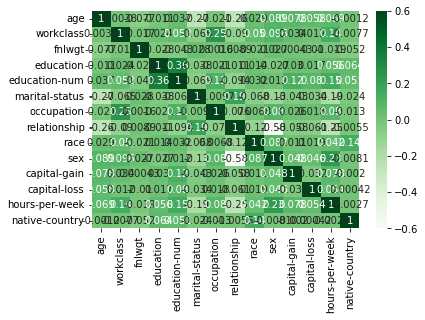

In [164]:
import seaborn as sns
df=X.join(y)
corrMatrix=df.corr()
corrMatrix
plt.subplot()
sns.heatmap(corrMatrix,annot=True,cmap='Greens',vmax=0.6,vmin=-0.6)

In [165]:
def plot_conf(ypred,y_test):
    cf_matrix = confusion_matrix( ypred,y_test)
    ax= plt.subplot()
    sns.heatmap(cf_matrix,annot=True,ax=ax, cmap="BuPu")
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix')

In [166]:
def acc_model(model,X_train,y_train,X_test,y_test):
    model.fit(X_train, y_train)
    ypred=model.predict(X_test)
    err=accuracy_score(y_test, ypred)
    print('{}% of the test samples are corrrectly classified \n\n'.format(err*100))
    plt.figure()
    plot_conf(ypred,y_test)
    
    return err

81.62387913032796% of the test samples are corrrectly classified 


81.02198747082669% of the test samples are corrrectly classified 




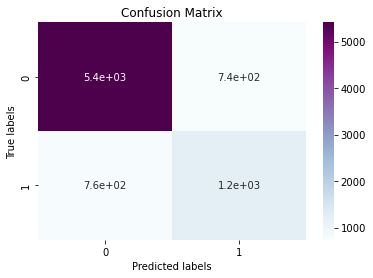

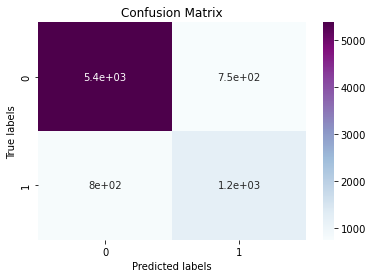

In [172]:
model=DecisionTreeClassifier()

err41=acc_model(model,x_train,y_train,x_test,y_test) #DT without scaling
err42=acc_model(model,X_train_std,y_train,X_test_std,y_test) # DT with scaling

85.92310526962291% of the test samples are corrrectly classified 


85.92310526962291% of the test samples are corrrectly classified 




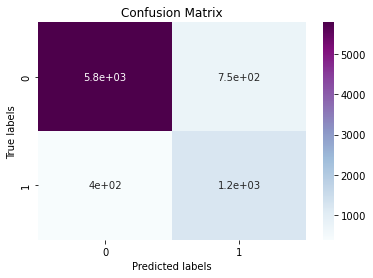

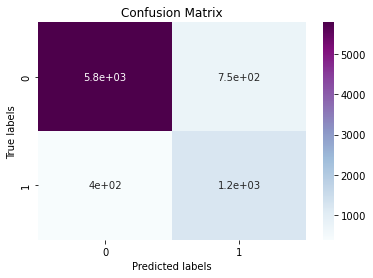

In [168]:
model=RandomForestClassifier(n_estimators=100, random_state=42)

err51=acc_model(model,x_train,y_train,x_test,y_test)         #RF without scaling
err52=acc_model(model,X_train_std,y_train,X_test_std,y_test)

85.35806411988699% of the test samples are corrrectly classified 


85.35806411988699% of the test samples are corrrectly classified 




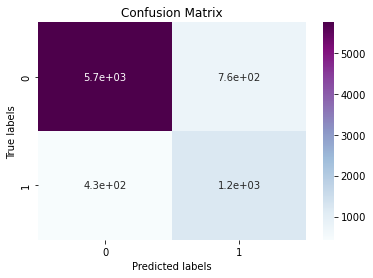

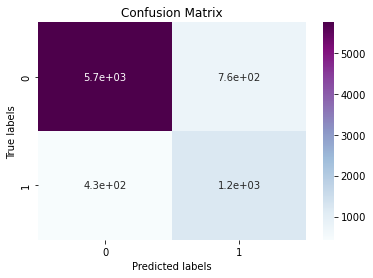

In [173]:
model=BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100, random_state=42)

err91=acc_model(model,x_train,y_train,x_test,y_test)         # without scaling
err92=acc_model(model,X_train_std,y_train,X_test_std,y_test) #  with scaling

86.89350202677804% of the test samples are corrrectly classified 


86.89350202677804% of the test samples are corrrectly classified 




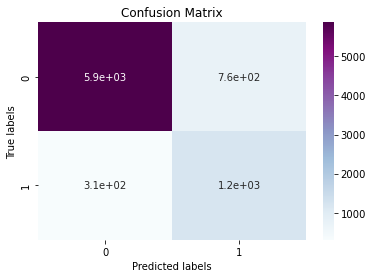

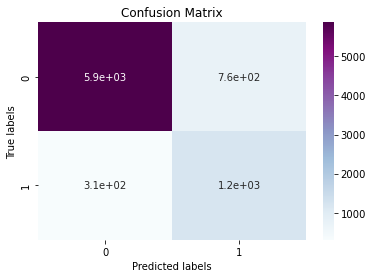

In [174]:
model=AdaBoostClassifier(n_estimators=100)

err111=acc_model(model,x_train,y_train,x_test,y_test)         # without scaling
err112=acc_model(model,X_train_std,y_train,X_test_std,y_test)